
# Homework 2: Introduction to Probability and Simulation 
***

**Name**: 

***

This assignment is due on Canvas by **11:59 PM on Friday February 14**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**. 

**NOTES**: 

- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code.
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- This should go without saying, but... For any question that asks you to calculate something, you **must show all work to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit.

---


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

***


### [20 points] Problem 1

To play a game, you have a box containing 20 fair [four-sided dice](https://en.wikipedia.org/wiki/Four-sided_die), with faces `{1,2,3,4}`.  This bag also contains 15 fair six-sided dice (faces `{1,2,3,4,5,6}`) and 5 fair twenty-sided dice (faces `{1,2,3,4,...,19,20}`).  Call these 3 classes of die "Four", "Six" and "Twenty" (or F, S, and T, for short).  You grab one die at random from the box.  

Work the following problems by hand (and LaTeX your solutions) unless otherwise stated (but don't be afraid to simulate to check your result!).

**Part A**: You roll your die one time.  What is the probability of the event $R_6$, that you roll a 6?  Include at least 4 decimal places in your final answer.

**Solution**:\
**Solving: $P(R_6)$** \
$P(F)=\frac{20}{40}=\frac{1}{2}$  := the probability of grabbing a four sided dice\
$P(S)=\frac{15}{40}=\frac{3}{8}$  := the probability of grabbing a six sided dice\
$P(T)=\frac{5}{40}=\frac{1}{8}$  := the probability of grabbing a twenty sided dice\
$P(R_6|F)=0$  := the probability of rolling a 6 on the four sided dice\
$P(R_6|S)=\frac{1}{6}$  := the probability of rolling a 6 on the six sided dice\
$P(R_6|T)=\frac{1}{20}$  := the probability of rolling a 6 on the twenty sided dice\
$P(R_6)=P(R_6|F)P(F)+P(R_6|S)P(S)+P(R_6|T)P(T)$  := the probability of rolling a 6\
$P(R_6)=0\cdot\frac{1}{2}+\frac{1}{6}\cdot\frac{3}{8}+\frac{1}{20}\cdot\frac{1}{8}=\frac{1}{16}+\frac{1}{160}$. Thus,\
$$P(R_6)=0.0688$$

In [2]:
F = {'roll' : np.array(range(1,5)), 'prob' : np.array([1/4]*4)}
S = {'roll' : np.array(range(1,7)), 'prob' : np.array([1/6]*6)}
T = {'roll' : np.array(range(1,21)), 'prob' : np.array([1/20]*20)}

dice_choices = {'dice' : np.array([F,S,T]), 'probs' : np.array([1/2, 3/8, 1/8])}

def sample_dice(dice_choices):
    # randomly choose a dice
    dice = np.random.choice(dice_choices['dice'], p = dice_choices['probs'])
    # randomly roll that dice
    return np.random.choice(dice['roll'], p = dice['prob'])

def probability_of_roll(roll, dice_choices, num_samples=1000):
    # get a bunch of dice
    die = np.array([sample_dice(dice_choices) for ii in range(num_samples)])
    # compute fraction of rolls of desired roll 
    return np.sum(die == roll) / num_samples

In [3]:
probability_of_roll(6, dice_choices, num_samples=500000)

0.068196

**Part B**: Suppose you roll a 6.  What is the probability that the die you chose from the box is a Six-sided die? 

**Solution**:\
$P(F)=\frac{20}{40}=\frac{1}{2}$  := the probability of grabbing a four sided dice\
$P(S)=\frac{15}{40}=\frac{3}{8}$  := the probability of grabbing a six sided dice\
$P(T)=\frac{5}{40}=\frac{1}{8}$  := the probability of grabbing a twenty sided dice\
$P(R_6|F)=0$  := the probability of rolling a 6 on the four sided dice\
$P(R_6|S)=\frac{1}{6}$  := the probability of rolling a 6 on the six sided dice\
$P(R_6|T)=\frac{1}{20}$  := the probability of rolling a 6 on the twenty sided dice\
**Solving: $P(S|R_6)$**\
$P(S|R_6)=\frac{P(S\cap R_6)}{P(R_6)}=\frac{P(R_6\cap S)}{P(R_6)}=\frac{P(R_6|S)P(S)}{P(R_6)}=\frac{P(R_6|S)P(S)}{P(R_6|F)P(F)+P(R_6|S)P(S)+P(R_6|T)P(T)} $ \
$=\frac{\frac{1}{6}\cdot \frac{3}{8}}{0\cdot\frac{1}{2}+\frac{1}{6}\cdot\frac{3}{8}+\frac{1}{20}\cdot\frac{1}{8}}$$=\frac{\frac{1}{16}}{\frac{1}{16}+\frac{1}{160}}$. Thus,\
$$P(S|R_6)=0.9091$$


**Part C:**  Are the events $R_6$ and $S$ independent?  Justify your answer **using math**.

**Solution:**\
$R_6$ and $S$ are independent, if and only if: \
1) $P(R_6|S)=P(R_6)$\
2) $P(S|R_6)=P(S)$\
3) $P(R_6\cap S)=P(R_6)P(S)$\
-\
We know that:\
$P(R_6|S)=0.1667$\
$P(R_6)=0.0688$\
$P(S|R_6)=0.9091$\
$P(S)=0.375$\
$P(R_6\cap S)=0.0625$\
$P(R_6)P(S)=0.0258$\
-\
We can observe that:\
$0.1667 \neq 0.0688$\
$0.9091 \neq 0.375$\
$0.0625 \neq 0.0258$\
-\
And thus, $R_6$ and $S$ are **NOT** independent events.

**Part D:** Suppose you roll your die $n$ times and record each outcome.  Obviously, if you roll 5 or 6 you know you did *not* pick a Four-sided die, and if you roll a 7 or higher, you must have picked a Twenty-sided die.

But, if you roll $n$ times in a row and get only 1, 2, 3 or 4, you would have a stronger belief that you in fact grabbed one of the Four-sided dice.  Let $E_n$ be the event that you roll $n$ rolls of 1, 2, 3 or 4 in a row.  For example, one outcome in $E_3$ is the sequence 2, 3, 1.

Given that you roll a single value of 1, 2, 3 or 4, what is the probability that you have grabbed a Four-sided die?  That is, calculate **by hand** $P(F \mid E_1)$. 

**Solution:**\
$P(F)=\frac{20}{40}=\frac{1}{2}$  := the probability of grabbing a four sided dice\
$P(S)=\frac{15}{40}=\frac{3}{8}$  := the probability of grabbing a six sided dice\
$P(T)=\frac{5}{40}=\frac{1}{8}$  := the probability of grabbing a twenty sided dice\
$P(E_1|F)=1$  := the probability of rolling a 1,2,3 or 4 on the four sided dice\
$P(E_1|S)=\frac{4}{6}$  := the probability of rolling a 1,2,3 or 4 on the six sided dice\
$P(E_1|T)=\frac{4}{20}$  := the probability of rolling a 1,2,3 or 4 on the twenty sided dice\
**Solving: $P(F|E_1)$**\
$P(F|E_1)=\frac{P(F\cap E_1)}{P(E_1)}=\frac{P(E_1\cap F)}{P(E_1)}=\frac{P(E_1|F)P(F)}{P(E_1)}=\frac{P(E_1|F)P(F)}{P(E_1|F)P(F)+P(E_1|S)P(S)+P(E_1|T)P(T)} $ \
$=\frac{1\cdot\frac{1}{2}}{1\cdot\frac{1}{2}+\frac{4}{6}\cdot \frac{3}{8}+\frac{4}{20}\cdot \frac{1}{8}}$. Thus,\
$$P(F|E_1)=0.6452$$


**Part E**:  First, work out **by hand** a formula for the probability in general that you are rolling a Four-sided die, given that you have rolled $n$ values in a row that are 1, 2, 3 or 4 (that is, $E_n$).  So you want a formula for $P(F \mid E_n)$ in terms of $n$.

Then, define and code a function `prob_four` to calculate $P(F \mid E_n)$.  This function should only take one positive integer argument, $n$.

Verify that your function is performing as expected by checking your answer to **Part D** when $n=1$.

**Solution**:\
Let the random variable x be the event that you rolled a four sided dice given that you rolled a 1,2,3 or 4 on the $n$th roll.\
$F(1)$ represents $P(F|E_1)=0.6452$\
$F(2)$ represents $P(F|E_2)=0.7444$\
$=\frac{1\cdot\frac{1}{2}}{1^2\cdot\frac{1}{2}+(\frac{4}{6})^2\cdot \frac{3}{8}+(\frac{4}{20})^2\cdot \frac{1}{8}}$\
Thus, $$F(n)=P(F|E_n)=\frac{1\cdot\frac{1}{2}}{1^n\cdot\frac{1}{2}+(\frac{4}{6})^n\cdot \frac{3}{8}+(\frac{4}{20})^n\cdot \frac{1}{8}}$$


In [4]:
F = {'roll' : np.array(range(1,5)), 'prob' : np.array([1/4]*4)}
S = {'roll' : np.array(range(1,7)), 'prob' : np.array([1/6]*6)}
T = {'roll' : np.array(range(1,21)), 'prob' : np.array([1/20]*20)}

dice_choices = {'dice' : np.array([F,S,T]), 'probs' : np.array([1/2, 3/8, 1/8])}

def prob_four(n): # Your code here.
    dice = np.random.choice(dice_choices['dice'],p=dice_choices['probs'])
    for ii in range(n):
        roll = np.random.choice(dice['roll'],p=dice['prob'])
    

**Part F:**  What is the smallest value of $n$ successive rolls of 1, 2, 3 or 4 that would make you believe that there's a better-than-90% chance that the die you grabbed is Four-sided?  Plugging larger and larger values for $n$ into your `prob_four` function is a very reasonable way to check this.

In [5]:
# Your code here.

**Solution:** 

***


### [20 points] Problem 2

Stella is very excited to have secured a professorship in the Computer Science department here at CU. She works hard, but has a problem finding her way around Boulder after leaving work. When she leaves work from the CU Engineering Center (E-Center), she must randomly choose a location on the map below and go there.   

Here are some rules governing her movements throughout the fair city of Boulder:
* When Stella is leaving one location, she randomly selects one of the available paths (denoted by arrows on the map), with equal probability, and goes to her next location.
* This includes back-tracking (when the arrows point in both directions). E.g. Stella could go from the Engineering Center to the Library, then directly back to the Engineering Center. 
* Note that the path from the Library to her Home is a one way path. Once she goes home, she does not return to the library, or any other location on the map. She stays at home. 
* Assume that all moves require the same amount of time.
* She cannot stay in one location, except for when she goes home. If she is not at her house, she must always move to another adjacent location.
* A "stop" is moving from one location to another. E.g. If Stella moves from the E-Center to the Library and then moves from the Library to the Gym, this is two "stops". 

<div>
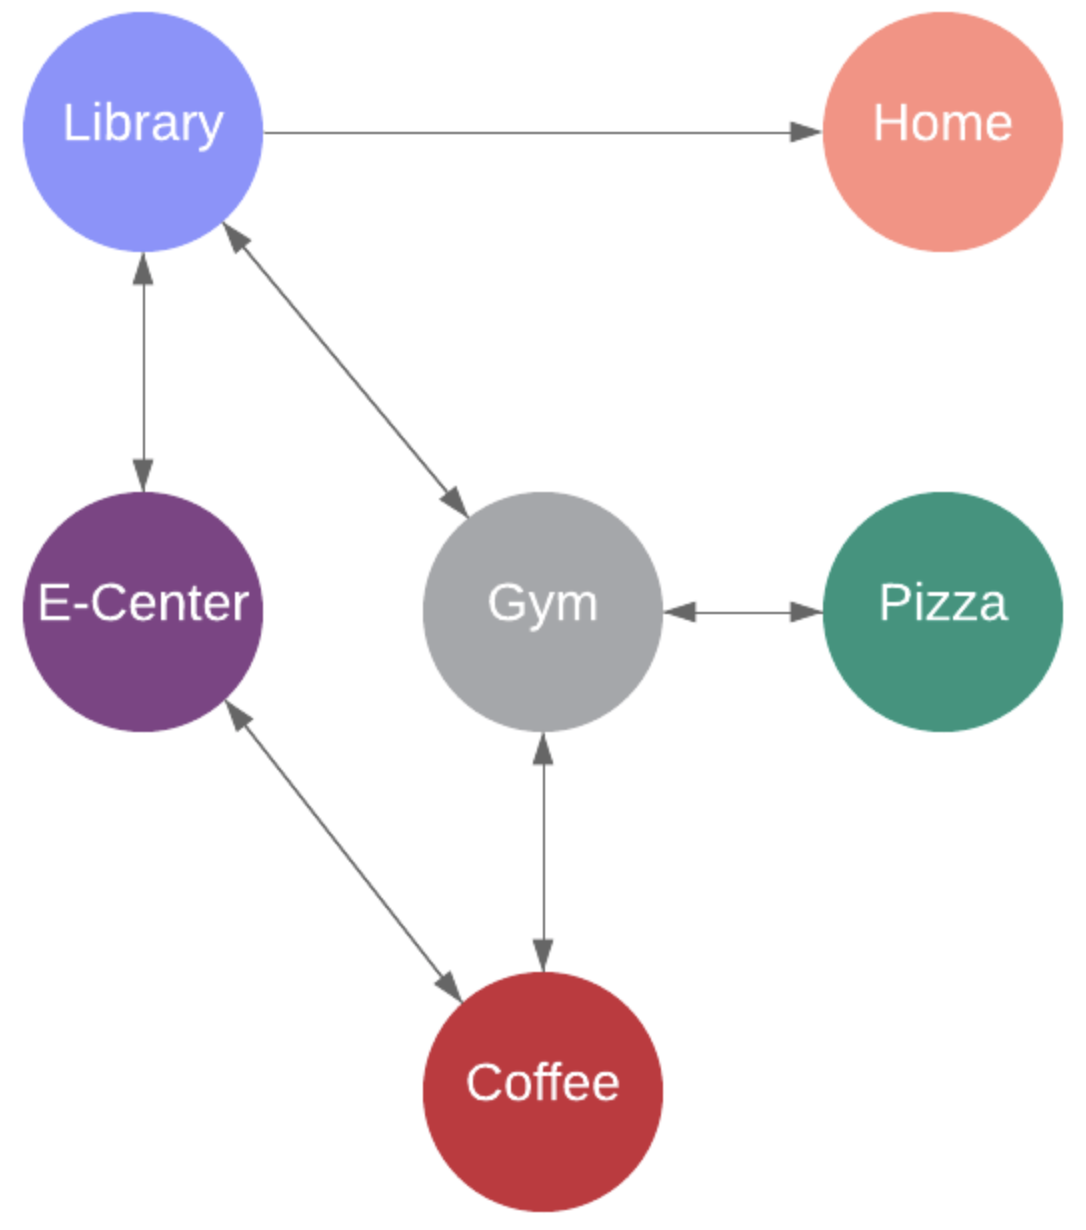
</div>

**Part A**: Stella is exhausted from a long day of researching whether [P=NP](https://en.wikipedia.org/wiki/P_versus_NP_problem) so, naturally, she wants to go to the Coffee Shop (Coffee) to grab a coffee.  

Compute the probability that Stella goes to the Coffee shop at least once in either in her first, second, or third stop after leaving from the E Center. **Calculate this by hand, showing your work in a markdown cell. You may leave answers as fractions or decimals. You may use python code as a calculator, but may not simulate this probability, or use functions that do all of the work for you.** 

**Solution:**\
The probability that Stella goes to the Coffee shop at least once in either her first, second, or third stop after leaving from the E Center can be calculated by taking how many ways Stella can get to coffee in 1-3 stops multiplied by the probability of Stella choosing those paths. \
There is one way for Stella to get to the Coffee shop in her first stop: $(E-Center \rightarrow Coffee)$ and she has a 50% probability of choosing this path. \
There is no way for Stella to be at the Coffee Shop in her second stop. \
There are three ways for Stella to get to the Coffee shop on her third stop:\
Way 1= $(E-Center \rightarrow Library \rightarrow E-Center \rightarrow Coffee)$\
Way 2= $(E-Center \rightarrow Library \rightarrow Gym \rightarrow Coffee)$\
The probability of way 1 =$(0.5*0.33*0.5)=0.0833$\
The probability of way 2 =$(0.5*0.33*0.33)=0.0556$\
Thus, the probability that Stella goes to the Coffee shop at least once in either in her first, second, or third stop after leaving from the E Center $=0.5+0.0833+0.0556=0.6389$


**Part B**: What is the probability that Stella gets to her house in exactly 2 stops after leaving the E-Center? **Calculate this by hand, showing you work in a markdown cell(s). You may leave answers as fractions or decimels. You may use python code as a calculator, but may not simulate this probability, or use functions that do all of the work for you.** 

**Solution:**\
The probability that Stella gets to her house in exactly 2 stops after leaving the E-Center is the probability that she goes to the Libary on her first stop times the probability that she goes home from the Library as her second stop. The respective probabilities are 0.5 and 0.33. Thus, the probability that Stella gets to her house in exactly 2 stops after leaving the E-Center = 0.1667.

**Part C:** What is the probability that Stella gets to her house in exactly 3 stops after leaving the E-Center? **Calculate this by hand, showing you work in a markdown cell(s). You may leave answers as fractions or decimels. You may use python code as a calculator, but may not simulate this probability, or use functions that do all of the work for you.** 

**Solution:**\
The probability that Stella gets to her house in exactly 3 stops is 0. If she first goes to the library, she must go to the gym which would make it impossible for her third stop to be her house. If she first goes to Coffee, there is no path she can take which would have her home in 2 stops. 

**Part D:** What is the probability that Stella gets to her house in exactly 4 stops after leaving the E-Center? What is the probability that she gets to her house in 4 or less stops? **Calculate this by hand, showing you work in a markdown cell(s). You may leave answers as fractions or decimels. You may use python code as a calculator, but may not simulate this probability, or use functions that do all of the work for you.** 

**Solution:**\
The probability that Stella gets to her house in exactly 4 stops can be calculated by the number of ways she can get home in 4 stops multiplied by the probability that she takes those paths. There are four paths which get Stella home in exactly 4 stops-\
Path 1:= $(E-Center \rightarrow Library \rightarrow E-Center \rightarrow Library \rightarrow Home)$\
Path 2:= $(E-Center \rightarrow Library \rightarrow Gym \rightarrow Library \rightarrow Home)$\
Path 3:= $(E-Center \rightarrow Coffee \rightarrow Gym \rightarrow Library \rightarrow Home)$\
Path 4:= $(E-Center \rightarrow Coffee \rightarrow E-Center \rightarrow Library \rightarrow Home)$\
These paths have the following probabilities-\
$P(Path 1) = 0.5*0.33*0.5*0.33=0.0278$\
$P(Path 2) = 0.5*0.33*0.33*0.33=0.0185$\
$P(Path 3) = 0.5*0.5*0.33*0.33=0.0278$\
$P(Path 4) = 0.5*0.5*0.5*0.33=0.0417$\
Thus, the probability that Stella gets to her house in exactly 4 stops $=0.0278+0.0185+0.0278+0.0417=0.1158$.\
\
The probability that she gets to her house in 4 or less stops can be represented by the sum of the probabilities of her getting home in 1 stop, or 2 stops, or 3 stops, or 4 stops. The probability that she gets home in 1 stop or 3 stops are both 0. We have previously calculated her probabilty of getting home in 2 stops and the probability of her getting home in 4 stops.\
Thus, the probability that she gets to her house in 4 or less stops $=0.1667+0.1158=0.2825$.


**Part E:** Write a Python simulation to confirm that your by-hand calculations in **Part B**, **Part C**, and **Part D** are correct. Don't worry about simulating **Part A**. Your simulation code should simulate Stella's movement after leaving the E-Center and end when she reaches home. You should run the simulation at least 2000 times and record how many stops it took Stella to get home on each run (in an array... don't print 2000 results). Then use that array to print the simulated probability of reaching home in 2 stops, 3 stops, 4 stops, and 4 or less stops. ***Then summarize your results in a markdown cell***.

***Make sure to either comment your code, write exteremely readable code, or use a markdown cell to explain what your code does. Code that isn't immediately understandable with no additional explanation will lose you credit.***

**Solution:**


In [6]:
# Your code here.
# make a dictionary for 
eCenter = {'Stops': np.array(['coffee','library']), 'Probs': np.array([1/2,1/2])}
library = {'Stops': np.array(['eCenter','gym','home']), 'Probs': np.array([1/3,1/3,1/3])}
gym = {'Stops': np.array(['library','pizza','coffee']), 'Probs': np.array([1/3,1/3,1/3])}
pizza = {'Stops': np.array(['gym']), 'Probs': np.array([1])}
coffee = {'Stops': np.array(['eCenter','gym']), 'Probs': np.array([1/2,1/2])}
stops = {'eCenter': eCenter, 'library': library, 'gym': gym, 'pizza': pizza, 'coffee': coffee}
    
numStopsTracker = []
numTrials = 2000
for ii in range(numTrials):
    stop = np.random.choice(eCenter['Stops'], p = eCenter['Probs'])
    numStops = 1
    while stop != 'home':
        stop = np.random.choice(stops[stop]['Stops'], p = stops[stop]['Probs'])
        numStops += 1
    numStopsTracker.append(numStops)
numStopsTracker = np.array(numStopsTracker)
oneStop = np.sum(numStopsTracker==1)
print("Probability Stella gets to her house in exactly 1 stop = ",oneStop/numTrials)
twoStop = np.sum(numStopsTracker==2)
print("Probability Stella gets to her house in exactly 2 stops = ",twoStop/numTrials)
threeStop = np.sum(numStopsTracker==3)
print("Probability Stella gets to her house in exactly 3 stops = ",threeStop/numTrials)
fourStop = np.sum(numStopsTracker==4)
print("Probability Stella gets to her house in exactly 4 stops = ",fourStop/numTrials)
fourOrLess = oneStop+twoStop+threeStop+fourStop
print("Probability Stella gets to her house in four or less stops = ",fourOrLess/numTrials)

Probability Stella gets to her house in exactly 1 stop =  0.0
Probability Stella gets to her house in exactly 2 stops =  0.1685
Probability Stella gets to her house in exactly 3 stops =  0.0
Probability Stella gets to her house in exactly 4 stops =  0.1155
Probability Stella gets to her house in four or less stops =  0.284


**Part F:** Make a frequency histogram of the number of stops it takes Stella to get home. Use a bin size of 1 and make sure to include all the data in the histogram (e.g. don't accidentally exclude data from your simulation by making too few bins). To make the graph more legible, make it a "bar" histogram with black edges. Look up the "histtype" and "ec" arguments to the histogram function in Matplotlib if you don't know how to do this. To further our goal of having this data look nice, make the figure 15 inches wide and 8 inches tall. Look up the "figsize" argument in Matplotlib if you don't know how to do this. Remember to include axis labels and a title. Make the graph nice and readable. Use the plt.show() function to avoid printing out extraneous information.

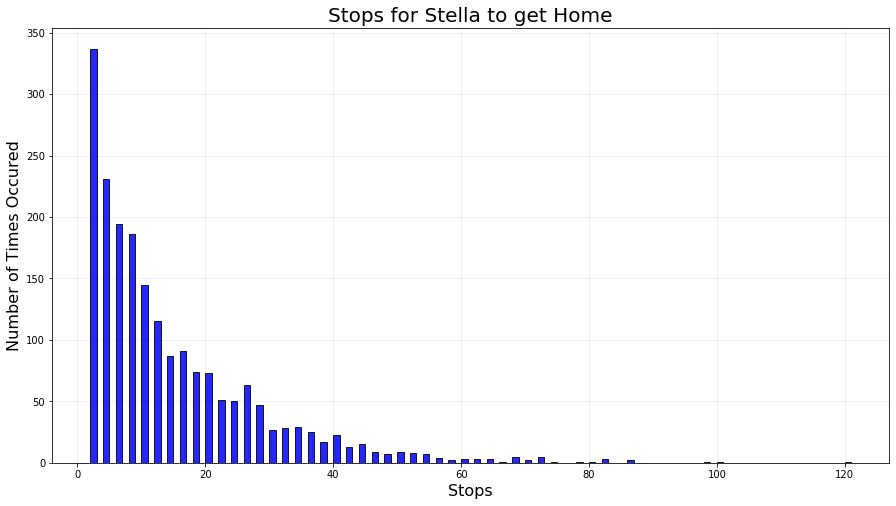

In [7]:
# Your code here.
my_bins = range(2,max(numStopsTracker)+2)

# Initialize figure
fig, ax = plt.subplots(figsize=(15,8))

# Plot histogram
ax.hist(numStopsTracker, bins=my_bins, facecolor="blue", edgecolor="black", alpha = 0.85, histtype="bar", density=False)

# Add a title
ax.set_title("Stops for Stella to get Home", fontsize=20)

# Add axis labels 
ax.set_xlabel("Stops", fontsize=16)
ax.set_ylabel("Number of Times Occured", fontsize=16)

# Make the grid lines lighter and put them behind data 
ax.grid(alpha=0.25)
ax.set_axisbelow(True)

plt.show()

**Part G:** Did you find it easier to calculate the probabilities by hand or simulate them with Python? What are some of the pro's and con's of simulating the probabilities versus calculating them by hand. Do you think it would be feasible to calculate the probabilities by hand for a graph that was much larger (eg. 100 Locations and 500 Paths)?

**Solution:** 

***


### [20 points] Problem 3  

As part of the Computer Science Jedi training, John and Tom will be having a lightsaber duel. The rules of the lightsaber duel are as follows:
* The duel is composed of a number of rounds.
* In each round John tries to strike Tom, then Tom tries to strike John.
* If John manages to strike Tom, then John is awarded a point, and similarly if Tom manages to strike John, then Tom is awarded a point.
* If a round ends in a tie, then John and Tom proceed to another round. If a round ends with one Jedi scoring a point but the other one does not, then the Jedi who scored a point wins the duel.

Let $J$ be the event that "John wins the duel", $F$ be the event that "the duel finishes after the first round of lightsaber strikes", and $G$ be the event that "the duel goes on after the first round of lightsaber strikes".  Suppose that the result of one lightsaber strike is independent of the other strikes. Furthermore, John successfully lands his lightsaber strikes with probability $p$, and Tom lands his strikes with probability $q$.

**Part A**: The duel will continue until John or Tom wins.  What is the sample space $\Omega$ for this "experiment"?  Represent the outcomes of individual lightsaber strikes by $H$ for a hit and $M$ for a miss, and assume that John has the first strike in each round. At the very least, your answer should include all of the events in $\Omega$ that include one or two rounds followed by "..." to show that you have established a pattern.

**Solution**: 


**Part B**: Determine $P(J \mid F)$ in terms of $p$ and $q$.

**Solution**:


**Part C**: Explain why events $J$ and $G$ are independent. 

**Solution**:


**Part D**: Use the Law of Total Probability to show that $P(J) = p(1-q) + (2pq - p - q +1) ~P(J \mid G)$. 

**Solution**: 


**Part E**: Use the independence property from **Part B** that $P(J \mid G) = P(J)$ to determine $P(J)$ in terms of $p$ and $q$. 

**Solution**: 


***


### [20 points] Problem 4

In this problem you will write some code to simulate the game of **Miniopoly** (a very rough approximation of <a href="https://en.wikipedia.org/wiki/Monopoly_(game)">Monopoly</a>). The game consists of a round board with 40 cells numbered from $0$ to $39$, where cell $0$ and would-be $40$ are coincident and called **GO**. A player starts at **GO** with \$200 in their pocket. On each turn the player rolls a pair of dice and move the number of cells equal to the sum of two dices. Landing on different cells have different results:

- Cells 2，8，13，17，25, and 33 causes you two draw a card. The cards may tell you to collect \\$50 or \\$100, or pay the bank \\$50 or \\$75. There is always an equal probability associated with drawing each of these possible cards.

<p> </p>

- Cell 1, 7, and 10 does not trigger any actions.

<p> </p>

- Cell 20 is **Lottery**. If a player lands on cell 20, then they are awarded a Lottery bonus of \\$500, this should be the input variable to your `miniopoly_turn` function called `bonus`.
<p> </p>

- Cell 30 is **Go To Jail**. If a player lands on cell 30, they would be locked up in jail.

<p> </p>

- If a player starts a turn in **Jail**, they roll a pair of dice:

    - If the player rolls doubles (i.e. the dice have equal values), then the player moves from Cell 10 a number of Cells equal to the sum of the dice.
    
    - If the player rolls anything other than doubles, then she pays the bank \\$25 and remains in **Jail**.
    
<p> </p>

- If a player passes or lands on **GO**, they collect \\$200.

<p> </p>

- If a player lands on other cells not mentioned above, they pay the bank an amount equal to the cell number (e.g. if they land on cell 19, they pay the bank \\$19).

<p> </p>

If at any point the player has \$0 or less they go bankrupt and the game ends.

See [here](http://www.cs.colorado.edu/~tonyewong/home/resources/miniopoly_example.png) for an example of the Miniopoly board layout.

<br>

**Part A**: Complete the function `miniopoly_turn` below. The function should simulate one turn of Miniopoly.  It should take as arguments the player's current location on the board as well as the player's current cash reserves and the amount of the Lottery (Cell 20) bonus, and return the player's new location and cash reserves after the turn has completed. Note that if a player goes bankrupt during the game you should return their cash as 0 instead of a negative value.

In [8]:
def miniopoly_turn(state, cash, bonus=500):
#     print("Current space: ",state," Current cash: ",cash)
    # roll two dice
    a = np.random.randint(1, 7)
    b = np.random.randint(1, 7)
#     print("ROLL := Dice 1:",a,", Dice 2:",b)
    
    # Your code here.
    # if player is in jail - 
    if state == 10:
#         print("In jail.")
        if a == b:
#             print("Doubles rolled. Move forward",(a+b),"spaces")
            state += (a+b)
        else:
#             print("Did not roll doubles. Pay bank $25.")
            cash -= 25
        # else, player stays in jail
    # player not in jail, move piece
    else:
        state += (a+b)
        if state >= 40:
            state -= 40
            cash += 200
    
    # Handle players current cell
    if (state == 2) or (state == 8) or (state == 13) or (state == 17) or (state == 25) or (state == 33):
        #draw a card: collect $50 or $100, or pay the bank $50 or $75. Equal probability
        #Cells 2，8，13，17，25, and 33 - draw a card
#         print("Draw a card.")
        card = np.random.choice(range(1,5))
        if card == 1:
#             print("Collect $50 from the bank.")
            cash += 50
        elif card == 2:
#             print("Collect $100 from the bank.")
            cash += 100
        elif card == 3:
#             print("Pay the bank $50.")
            cash -= 50
        else:
#             print("Pay the bank $75.")
            cash -= 75
    elif (state == 1) or (state == 7) or (state == 10) or (state == 0):
        # no action
        #Cell 1, 7, and 10 - no actions
#         print("Blank space. No action this turn")
        pass
    elif (state == 20):
        #win bonus
        #Cell 20 - Lottery
#         print("Won the lottery. Collect $",bonus)
        cash += bonus
    elif (state == 30):
        #go to jail
        #Cell 30 - Go To Jail.
#         print("Go Directly To Jail.")
        state = 10
    else:
        #pay bank state number
        #else - pay bank cell equal to cell number
#         print("Pay bank $",state)
        cash -= state
    
    #if player goes bankrupt during the game, return cash as 0 instead of a negative value
    if cash<0:
        cash=0
        
    return state, cash

In [9]:
miniopoly_turn(10,500)

(10, 475)

**Part B:** Use your function from **Part A** to stimulate at least 5000 games of Miniopoly that consists 20 turns and 40 turns, respectively. Make a **density** histogram of the player's cash amount at the end of the game under the both the 20-turn and 40-turn scenarios. Plot both histograms on the same set of axes, the histogram box faces should be slightly transparent and of different colors, so as to be able to tell the 2 game-length scenarios apart. For both histograms, use bins of width \$250, starting at 0 on the left and extending as far to the right as needed. As always, be sure to label your axes and include an informative legend.

In [10]:
# Your code here.
t20Results = []
t40Results = []
for ii in range(5000):
    player = {'state':0, 'cash':200}
    for turn in range(20):
        if (player['cash']>0):
            #do turn
            player['state'],player['cash'] = miniopoly_turn(player['state'],player['cash'])
        else:
            #store results
            pass
    #     print("======================")
    #     print("Turn:,",turn)
    #     print("Player 1: on:",player1['state'],", cash:",player1['cash'])
    #     print("Player 2: on:",player2['state'],", cash:",player2['cash'])
    #     print("======================")

    t20Results.append(player['cash'])
    
for ii in range(5000):
    player = {'state':0, 'cash':200}
    for turn in range(40):
        if (player['cash']>0):
            #do turn
            player['state'],player['cash'] = miniopoly_turn(player['state'],player['cash'])
        else:
            #no turn
            pass
    #     print("======================")
    #     print("Turn:,",turn)
    #     print("Player 1: on:",player1['state'],", cash:",player1['cash'])
    #     print("Player 2: on:",player2['state'],", cash:",player2['cash'])
    #     print("======================")

    t40Results.append(player['cash'])
print("DONE")

DONE


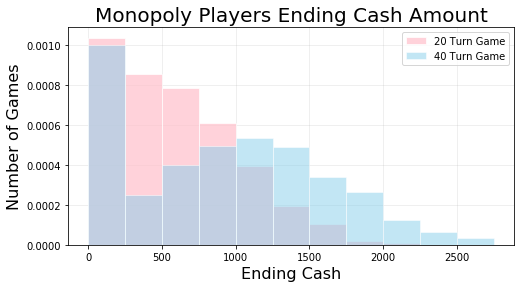

In [11]:
my_bins = range(0,3000,250)
g1Plot = np.array(t20Results)
g2Plot = np.array(t40Results)
# Initialize figure
fig, ax = plt.subplots(figsize=(8,4))

# Plot histogram
ax.hist(g1Plot, bins=my_bins, facecolor="pink", edgecolor="white", alpha = 0.7, label = '20 Turn Game', density=True)
ax.hist(g2Plot, bins=my_bins, facecolor="skyblue", edgecolor="white", alpha = 0.5, label = '40 Turn Game', density=True)

# Add a title
ax.set_title("Monopoly Players Ending Cash Amount", fontsize=20)

# Add axis labels 
ax.set_xlabel("Ending Cash", fontsize=16)
ax.set_ylabel("Number of Games", fontsize=16)

# Make the grid lines lighter and put them behind data 
ax.grid(alpha=0.25)
ax.set_axisbelow(True)

ax.legend()
plt.show()

**Part C**: Use your code from **Part A** and **Part B** to estimate the probability that a player goes bankrupt in the 60 turns. Simulate at least 10,000 games.

In [12]:
# Your code here.
numTurns = 60
numSims = 10000
countBankrupt = 0
for sims in range(numSims):
    player = {'state':0, 'cash':200}
    for turns in range(numTurns):
        if (player['cash']>0):
            # do turn
            player['state'],player['cash'] = miniopoly_turn(player['state'],player['cash'])
        else:
            # no turn
            pass
    if (player['cash']==0):
        countBankrupt += 1
print("Probability of going bankrupt in the first",numTurns,"turns =",countBankrupt/numSims)

Probability of going bankrupt in the first 60 turns = 0.2329


**Part D**:  Use your code from **Part A** and **Part B** to estimate the probability that a player goes bankrupt in a 60 turn game  _given_ that they have been to **Jail** at least twice and never won a **Lottery**.  Is a player more or less likely to go bankrupt if they've been to jail twice and never won a **Lottery**? Simulate at least 10,000 games.

NOTE: If a player is already in jail and failed to roll a double, she will remain in Jail, which would increase the number of time she has been to jail by one.

In [13]:
# Your code here.
numTurns = 60
numSims = 10000
countBankrupt = 0
lotAndJail = 0
for sims in range(numSims):
    player = {'state':0, 'cash':200}
    jailCount = 0
    lottery = False
    for turns in range(numTurns):
        if (player['cash']>0):
            # do turn
            player['state'],player['cash'] = miniopoly_turn(player['state'],player['cash'])
            if player['state'] == 20:
                lottery = True
            if player['state'] == 10:
                jailCount += 1
        else:
            # no turn
            pass
    if (player['cash']==0):
        countBankrupt += 1
        if (lottery == False) and (jailCount >= 2):
            lotAndJail += 1
print("Probability of going bankrupt in the first",numTurns,"turns =",lotAndJail/countBankrupt)

Probability of going bankrupt in the first 60 turns = 0.8784530386740331


***


### [20 points] Problem 5

Suppose you roll two fair six-sided dice.  Let $C$ be the event that the two rolls are _close_ to one another in value, in the sense that they're either equal or differ by only 1. 

**Part A**:  Compute $P(C)$ by hand. 


**Solution:**\
$P(C|R_1)=\frac{2}{6}$ - need to roll a 1 or 2\
$P(C|R_2)=\frac{3}{6}$ - need to roll a 1, 2 or 3\
$P(C|R_3)=\frac{3}{6}$ - need to roll a 2, 3 or 4\
$P(C|R_4)=\frac{3}{6}$ - need to roll a 3, 4 or 5\
$P(C|R_5)=\frac{3}{6}$ - need to roll a 4, 5 or 6\
$P(C|R_6)=\frac{2}{6}$ - need to roll a 5 or 6\
Thus, $P(C)=(\frac{2}{6}*\frac{1}{6})+(\frac{3}{6}*\frac{1}{6})+(\frac{3}{6}*\frac{1}{6})+(\frac{3}{6}*\frac{1}{6})+(\frac{3}{6}*\frac{1}{6})+(\frac{2}{6}*\frac{1}{6})$,
$$P(C)=0.444$$


**Part B**: Write a simulation to run many trials (at least 10,000) of the pair of rolls and estimate the value of $P(C)$ you calculated in **Part A**.  Does your estimate agree with the exact calculation you did in **Part A**?  If not, try increasing the number of trials in your simulation. 

In [14]:
# Your code here. 
dice = {'roll': np.array([1,2,3,4,5,6]), 'probs': np.array([1/6]*6)}
close = 0
numTrials = 100000
for ii in range(numTrials):
    roll1 = np.random.choice(dice['roll'], p=dice['probs'])
    roll2 = np.random.choice(dice['roll'], p=dice['probs'])
    if roll1 == roll2 or roll1 == (roll2+1) or roll1 == (roll2-1):
        close += 1
print("Probability of close:",close/numTrials)

Probability of close: 0.44525


**Part C**: In the in-class notebook associated with Lecture 4 (nb04) we plotted a running estimate of the probability of an event as a function of the number of trials in our simulation.  Write code to run at least 10 independent simulations of at least 50,000 trials each to estimate $P(C)$ and plot their running estimate curves on the same set of axes. **Hint**: This is a lot of computation, so try to leverage Numpy as much as possible so that your code doesn't run forever. 

In [15]:
# Your code here.
numSims = 10
results = []
for i in range(numSims):
    close = 0
    numTrials = 50000
    p = np.zeros(numTrials+1)
    for ii in range(1,numTrials+1):
        roll1 = np.random.choice(dice['roll'], p=dice['probs'])
        roll2 = np.random.choice(dice['roll'], p=dice['probs'])
        if roll1 == roll2 or roll1 == (roll2+1) or roll1 == (roll2-1):
            close += 1
        p[ii] = close/ii
    results.append(p)
    print("Completed...",i,"/10")
print("Done")

Completed... 0 /10
Completed... 1 /10
Completed... 2 /10
Completed... 3 /10
Completed... 4 /10
Completed... 5 /10
Completed... 6 /10
Completed... 7 /10
Completed... 8 /10
Completed... 9 /10
Done


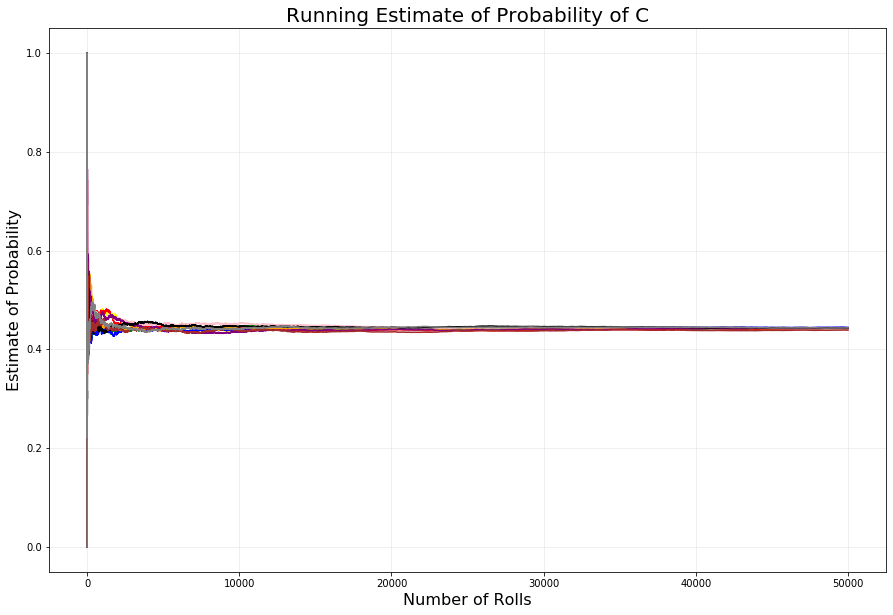

In [16]:
fig, ax = plt.subplots(figsize=(15,10))

ax.plot(results[0], color="Yellow")
ax.plot(results[1], color="Green")
ax.plot(results[2], color="Blue")
ax.plot(results[3], color="Red")
ax.plot(results[4], color="Orange")
ax.plot(results[5], color="Pink")
ax.plot(results[6], color="Purple")
ax.plot(results[7], color="Black")
ax.plot(results[8], color="Brown")
ax.plot(results[9], color="Gray")

ax.set_title("Running Estimate of Probability of C", fontsize=20)
ax.set_xlabel("Number of Rolls", fontsize=16)
ax.set_ylabel("Estimate of Probability", fontsize=16)

ax.grid(True, alpha=0.25)

**Part D**: Comment on the behavior of the running estimates as the number of trials increases. 

**Solution:**\
As the number of trials increases, the running estimate gets closer and closer to 0.444. It appears to be fairly close to 0.444 by about 10,000 rolls, but continues to approach this number as the number of rolls increases. 